In [150]:
import numpy as np
from astropy.constants import R_sun, M_sun, G, k_B, m_p
import astropy.units as u

from funcs.model import calculate_specific_flare_flux, calculate_angular_radius

def get_frac_area(radius):
    return np.sin(radius / 180 * np.pi / 2.)**2


import matplotlib.pyplot as plt
%matplotlib inline


import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

font = {'family' : 'courier',
        'weight' : 'normal',
        'size'   : 15}

# 10kK assumption

In [6]:
k_B

<<class 'astropy.constants.codata2018.CODATA2018'> name='Boltzmann constant' value=1.380649e-23 uncertainty=0.0 unit='J / K' reference='CODATA 2018'>

In [15]:
calculate_specific_flare_flux("TESS", flaret=7e3)

<Quantity 3.57701096e+10 erg / (cm2 s)>

In [24]:
a = 1.
qlum = 1e29 * u.erg / u.s
R = .5 * R_sun
Teff = np.linspace(5e3,5e4,20)
Fth = [calculate_specific_flare_flux("TESS", flaret=t) for t in Teff]
radius = [calculate_angular_radius(fth, a, qlum, R) for fth in Fth]
fill_factor = get_frac_area(np.array(radius)) * 4.

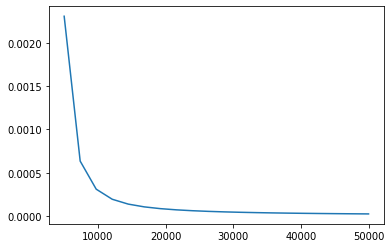

In [26]:
plt.plot(Teff, fill_factor)
#plt.yscale("log")

In [10]:
fill_factor

0.007270925155549293

In [27]:
(1e-7 / u.s * np.pi * 2).to("1/d")

<Quantity 0.05428672 1 / d>

In [28]:
2piR/P = vsini / sin i

sin i = vsini * P / 2piR

SyntaxError: invalid syntax (<ipython-input-28-b2ec6745cc59>, line 1)

# back of the envelope calculation: pressure scale height

In [25]:
M = 0.16
Teff = 3030. * u.K
R =  0.199
g = G * (M * M_sun) / (R * R_sun)**2

In [26]:
H = k_B * Teff / (m_p * g)

In [27]:
H.decompose()

<Quantity 22575.98298498 m>

In [19]:
H.decompose()

<Quantity 13837.89950645 m>

In [20]:
13.8 / 180. #M6

0.07666666666666667

In [24]:
9.5 / 180. #L1

0.05277777777777778

In [28]:
22.6 / 180. #M5

0.12555555555555556

The pressure scale heights of the stars in our sample are about $5-13 \%$ of the solar

In [32]:
print(22.6 / (.199 * R_sun), 9.5 / (.107 * R_sun), 180. / (1. * R_sun) )

1.6324254591918916e-07 1 / m 1.2761973081640357e-07 1 / m 2.58732212160414e-07 1 / m


In [36]:
1.63 / 2.59, 1.28/2.59

(0.6293436293436293, 0.4942084942084942)

The relative height of atmospheres on M5-L1 dwarfs is $50-63\%$ percent of the relative solar height.

# latitude vs. flux

In [46]:
from altaipony.altai import equivalent_duration
from altaipony.flarelc import FlareLightCurve
import os
CWD = "/".join(os.getcwd().split("/")[:-2])
import pandas as pd


# Plot stuff
from funcs.model import full_model, aflare

In [43]:
# Datasets we analysed
datasets = [
            (277539431, "", "08_07_2020_11_48"),
            (237880881, "a", "11_02_2020_10_07"),
            (237880881, "b", "11_02_2020_10_07"),
            (44984200, "", "02_08_2020_17_44"),
            (44984200, "a", "04_08_2020_13_40"),
            (44984200, "b", "04_08_2020_13_40"),
            (100004076, "", "18_08_2020_15_38"),
            ]

In [77]:
vals

['ED_s_16',
 'ED_s_50',
 'ED_s_84',
 'Eflare_erg_16',
 'Eflare_erg_50',
 'Eflare_erg_84',
 'ID',
 'a_16',
 'a_50',
 'a_84',
 'color',
 'frac_area_16',
 'frac_area_50',
 'frac_area_84',
 'fwhm_d_16',
 'fwhm_d_50',
 'fwhm_d_84',
 'i_deg_16',
 'i_deg_50',
 'i_deg_84',
 'latitude_deg_16',
 'latitude_deg_50',
 'latitude_deg_84',
 'linestyle',
 'phase_deg_16',
 'phase_deg_50',
 'phase_deg_84',
 'rad_rsun_16',
 'rad_rsun_50',
 'rad_rsun_84',
 't0_d_16',
 't0_d_50',
 't0_d_84',
 'tstamp']

In [82]:
res= pd.read_csv(f"{CWD}/analysis/results/mcmc/mcmcoutput.csv").loc[:6]
res.suffix = res.suffix.fillna("").astype(str)
vals = list(res.columns.values)
vals.remove("suffix")
vals.remove("tstamp")
vals.remove("color")
vals.remove("linestyle")
vals.remove("ID")
res[vals] = res[vals].astype(float) 

ID                             277539431
QCS                                   12
typ                                  slc
cadence_min                            2
mission                             tess
prefix                               TIC
origin                            custom
h_mission                           TESS
SpT                                   M7
view_start                          1641
view_stop                         1643.5
view_min                             750
view_max                             970
BJDoff                           2457000
tstart                           1641.84
ampl_min                             0.9
ampl_max                             1.7
GRP                                 1.52
plxmas                           72.9672
eplxmas                            0.569
RA                               163.815
Dec                             -73.9364
J                                  10.63
R                                    NaN
Gaia_G          

ID                     44984200
QCS                          10
typ                         slc
cadence_min                   2
mission                    tess
prefix                      TIC
origin                   custom
h_mission                  TESS
SpT                          M6
view_start              1587.25
view_stop               1589.75
view_min                   1620
view_max                   2200
BJDoff                  2457000
tstart                  1588.03
ampl_min                    0.5
ampl_max                    0.8
GRP                        1.54
plxmas                  90.0357
eplxmas                0.222697
RA                      129.508
Dec                    -58.9331
J                        10.309
R                         15.08
Gaia_G                  14.4115
vsini_kms                  34.8
e_vsini_kms                 0.8
Prot_d                    0.113
sini                        NaN
Ref                   this work
identifier       SCR J0838-5855
Rstar   

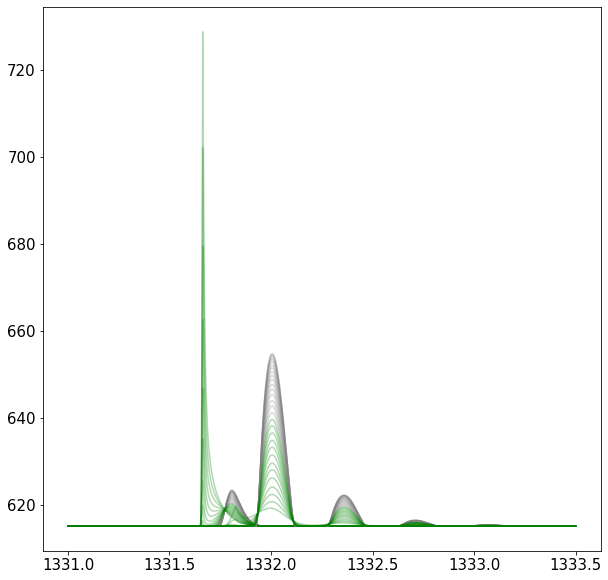

In [164]:
est = {}
plt.figure(figsize=(10,10))
for j, row in res.iterrows():
  
    # Get data
    #df = pd.read_csv(f"{CWD}/analysis/results/mcmc/{row.tstamp}_{row.ID}{row.suffix}_converted_mcmc_sample.csv")
    lc = pd.read_csv(f"{CWD}/data/lcs/{row.tstamp}_{row.ID}.csv")
    props = pd.read_csv(f"{CWD}/data/summary/lcsi.csv")
    target = props[props.ID == int(row.ID)].iloc[0]
    print(target)
    # Pick up the input parameters
    inits = pd.read_csv(f"{CWD}/data/summary/inits.csv")
    inits = inits[(inits.ID == str(row.ID)+row.suffix) & (inits.tstamp==row.tstamp)].iloc[0]

    qlum = inits.qlum_erg_s * u.erg / u.s
    Fth = inits.Fth * u.erg/ u.cm**2 / u.s
    median = inits['median']
    R = inits.R_Rsun * R_sun
    
     # Plot the results
    N = 50
    time = lc.t
    phi = lc.phi.values
    flux = lc.flux.values
    inds = np.random.randint(df.shape[0], size=N)


    a = row.a_50
    phi_a = (row.t0_d_50 -lc.t[0]) / target.Prot_d * 2 * np.pi 
    #theta_a = row.latitude_deg_50 / 180 * np.pi
    fwhm = row.fwhm_d_50 / target.Prot_d * 2 * np.pi
    #i = row.i_deg_50 / 180 * np.pi
    i = np.pi/2

    phi0 = phi_a%(2.*np.pi) - (row.phase_deg_50  / 180 * np.pi)
    flare = aflare(phi, phi_a, fwhm, a*median)+ median
    print(f"ID: {row.ID}\n")
    est[str(row.ID) + row.suffix] = {}
    for theta_a in np.linspace(5,85,30): 
        th = theta_a / 180. * np.pi
        fullmodel = full_model(phi_a, th, a, fwhm, i, phi0=phi0,
                               phi=phi, num_pts=50, qlum=qlum,
                               Fth=Fth, R=R, median=median)

        flc = FlareLightCurve(time=time, detrended_flux=fullmodel, )
        flc.it_med = np.full_like(time, median)
        ED = equivalent_duration(flc,0,-2)
        est[str(row.ID) + row.suffix][theta_a] = ED * qlum.value
        if str(row.ID) == "237880881":
            if theta_a > 50:
                c = "g"
            else:
                c = "grey"
            plt.plot(flc.time, flc.detrended_flux, c=c, alpha=.3)
            

In [165]:
# reform = {(outerKey, innerKey): values for outerKey, 
#           innerDict in est.items() for innerKey, 
#           values in innerDict.items()}
esti = pd.DataFrame(est)
esti

,277539431,237880881a,237880881b,44984200,44984200a,44984200b,100004076
5.000000,9.458330e+33,8.943701e+32,6.701118e+33,6.621809e+32,4.040224e+32,1.005602e+32,8.933709e+31
7.758621,9.396570e+33,8.931704e+32,6.656416e+33,6.586572e+32,4.018709e+32,1.000222e+32,8.885821e+31
10.517241,9.342818e+33,8.830182e+32,6.616057e+33,6.536124e+32,3.987908e+32,9.925253e+31,8.817343e+31
13.275862,9.245210e+33,8.756397e+32,6.549663e+33,6.470581e+32,3.947893e+32,9.825309e+31,8.728433e+31
16.034483,9.133410e+33,8.676000e+32,6.470228e+33,6.390096e+32,3.898755e+32,9.702616e+31,8.619297e+31
18.793103,8.990290e+33,8.568329e+32,6.376551e+33,6.294864e+32,3.840613e+32,9.557458e+31,8.490188e+31
21.551724,8.846006e+33,8.479709e+32,6.252817e+33,6.185112e+32,3.773601e+32,9.390171e+31,8.341407e+31
24.310345,8.679366e+33,8.335185e+32,6.143377e+33,6.061088e+32,3.697872e+32,9.201144e+31,8.173297e+31
27.068966,8.484418e+33,8.157049e+32,5.999263e+33,5.923075e+32,3.613607e+32,8.990814e+31,7.986248e+31
29.827586,8.277883e+33,8.032275e+32,5.853988e+33,5.771401e+32,3.521008e+32,8.759671e+31,7.780695e+31


2.345038241554055e+33
237880881a
6.005072879394382e+32
3.669413702184464e+33
2.1739909388401887e+32
44984200a
4.362031220491113e+31
9.200699955836329e+30
6.188381775283679e+31


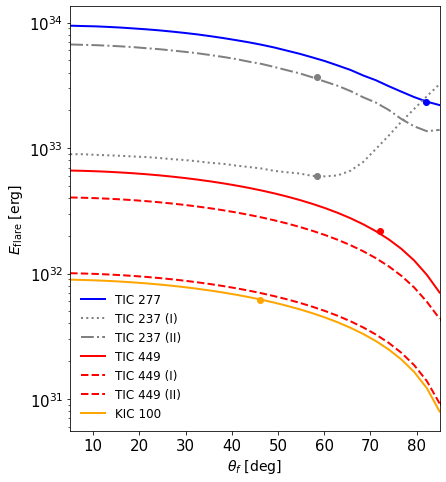

In [190]:
plt.figure(figsize=(6,6.5))
for col in esti:

    if "a" in col:
        print(col)
        _ = res[(res.ID.str[:5] == col[:5]) & (res.suffix == "a")]
        suff = " (I)"
    elif "b" in col:
        _ = res[(res.ID.str[:5] == col[:5]) & (res.suffix == "b")]
        suff = " (II)"
      
    else:
        _ = res[(res.ID.str[:5] == col[:5]) & (res.suffix == "")]
        suff = ""
    c = _.iloc[0].color
    l = _.iloc[0].linestyle
    lab = str(props[props.ID == int(_.ID)].iloc[0].prefix) + " " +  _.iloc[0].ID[:3] + suff
    plt.plot(esti.index, esti[col], color =c, label=lab, linestyle=l, linewidth=2)
    I = np.argmin(np.abs(esti.index.values - _.iloc[0].latitude_deg_50))
    en = esti.loc[esti.index[I], str(col)]
    print( esti.loc[esti.index[I], str(col)])
    plt.scatter(x=_.latitude_deg_50, y=en, c=c)

plt.legend(frameon=False, fontsize=12)
plt.xlim(5,85)
plt.yscale("log")
plt.tight_layout()
# plt.ylabel(r"$ED$ [s]", fontsize=14)
plt.ylabel(r"$E_\mathrm{flare}$ [erg]", fontsize=14)

plt.xlabel(r"$\theta_f$ [deg]", fontsize=14);

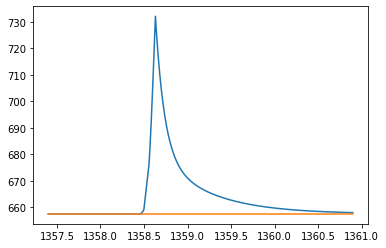

In [84]:
plt.plot(flc.time, flc.detrended_flux)
plt.plot(flc.time, flc.it_med)

In [85]:
equivalent_duration(flc,0,-4)

2868.7908427679163

In [54]:
len(time)

891

In [109]:
row.ID

'100004076'

# Inclinations from Elisabeth

In [161]:
incl = pd.read_csv(f"{CWD}/data/inclinations/inclination_output.dat", delimiter=r"\s+")
incl

,prefix,id,inclination,inclination_lowerr,inclination_uperr
0,KIC,100004076,58.592186,-13.990519,18.499819
1,TIC,237880881,22.210949,-3.943153,4.006488
2,TIC,44984200,33.159762,-0.868109,0.838674
3,TIC,277539431,82.895193,-5.781124,4.903759
